Quant Project 1 — Stock Analytics Dashboard

#This notebook downloads historical price data for a few tickers, computes daily returns,annualized risk/return statistics (volatility and Sharpe ratio), and plots cumulative returns.

In [11]:
# 1. Setup
# If running in a fresh environment, uncomment and run the line below
# !pip install yfinance pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

plt.rcParams["figure.figsize"] = (10, 6)

In [12]:
# 2. Parameters
tickers = ["AAPL", "MSFT", "NVDA"]  # You can change these anytime
start_date = "2022-01-01"
end_date = "2025-01-01"

print("Tickers:", tickers)
print("Date range:", start_date, "to", end_date)

Tickers: ['AAPL', 'MSFT', 'NVDA']
Date range: 2022-01-01 to 2025-01-01


In [13]:
# 3. Download adjusted prices
raw = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True, progress=False)

# The DataFrame has MultiIndex columns (e.g., ('Close','AAPL'))
# Selecting the 'Close' level gives one column per ticker.
prices = raw["Close"]
prices.head()

Ticker,AAPL,MSFT,NVDA
Date,,,
2022-01-03,178.443100,324.504578,30.064440
2022-01-04,176.178421,318.940277,29.235001
2022-01-05,171.492096,306.696747,27.552168
2022-01-06,168.629303,304.273346,28.125086
2022-01-07,168.795990,304.428436,27.195831


In [14]:
# 4. Compute daily returns
returns = prices.pct_change().dropna()
returns.head()

Ticker,AAPL,MSFT,NVDA
Date,,,
2022-01-04,-0.012691,-0.017147,-0.027589
2022-01-05,-0.026600,-0.038388,-0.057562
2022-01-06,-0.016693,-0.007902,0.020794
2022-01-07,0.000988,0.000510,-0.033040
2022-01-10,0.000116,0.000733,0.005615


In [15]:
# 5. Annualized summary statistics
TRADING_DAYS = 252

summary = pd.DataFrame({
    "Mean Return": returns.mean() * TRADING_DAYS,
    "Volatility": returns.std() * np.sqrt(TRADING_DAYS),
})
summary["Sharpe Ratio"] = summary["Mean Return"] / summary["Volatility"]
summary.round(4)

,Mean Return,Volatility,Sharpe Ratio
Ticker,,,
AAPL,0.1490,0.2709,0.5498
MSFT,0.1238,0.2758,0.4489
NVDA,0.6522,0.5527,1.1801


In [16]:
# 6. Save results (CSV)
summary_csv_path = "summary_stats.csv"
summary.round(6).to_csv(summary_csv_path, index=True)
print(f"Saved: {summary_csv_path}")

Saved: summary_stats.csv


Saved plot: cumulative_returns.png


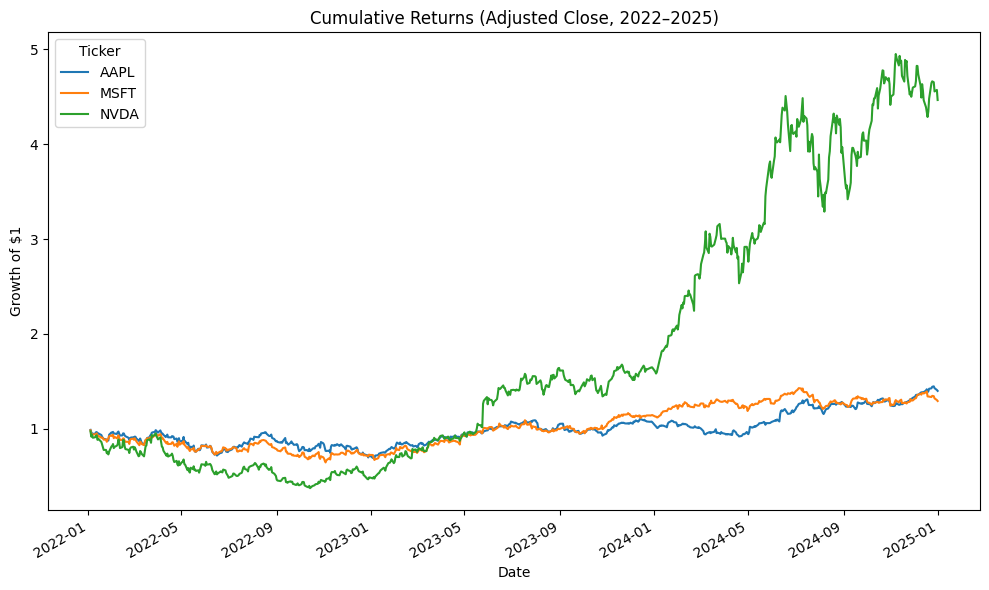

In [17]:
# 7. Plot cumulative returns
growth = (1 + returns).cumprod()

ax = growth.plot()
ax.set_title("Cumulative Returns (Adjusted Close, 2022–2025)")
ax.set_xlabel("Date")
ax.set_ylabel("Growth of $1")
plt.tight_layout()

# Save the plot (so it shows even in headless environments like Codespaces)
fig_path = "cumulative_returns.png"
plt.savefig(fig_path, dpi=150)
print(f"Saved plot: {fig_path}")
plt.show()

## 8. Quick interpretation

- #**Higher volatility** often pairs with **higher average return**, but not always.  
- #The **Sharpe Ratio** compares **risk-adjusted performance** across tickers.  
- #Try replacing these tickers with ETFs or other stocks you’re interested in.  